In [107]:
import pandas as pd
import pyodbc
import urllib.request

pd.set_option("max_rows", None)
pd.set_option('max_columns', None)

In [108]:
#set the required country

country = "BRAZIL"

In [143]:
#get the database

server = 'scoutfy-db.cdnl3plncvrr.sa-east-1.rds.amazonaws.com,1433' 
database = 'panorama' 
username = 'admin' 
password = 'Scoutfy20' 
cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()

data = pd.read_sql_query('SELECT * FROM [panorama].[dbo].[athletics]',cnxn)

data = data.replace(['nan'],float('NaN'))
data.head()

,Created On,Created By,Item ID,Athletics or Varsity Sports - NAME,Athletics ACRONYM,Athletics NICKNAME,Athletics Logo,Kind,Division,Athletics WEBSITE,Website status,About Athletics Scholarships,Sports,Country,State,City - STATE,Address,Latitude,Longitude,Phone,Mobile,Institutional Contact Number Status,Institutional Email,Email analysis,Course,EDUCATION INSTITUTION which is Affiliated to,HIERARCHICAL AFFILIATION,HIERARCHICAL - Vinculated,HIERARCHICAL - Recognized,Sponsors / Patrocinadores,Partners & Supporters / Parceiros & Apoiadores\t,Suppliers / Fornecedores,Media Partners / Parceiros de Mídia,Facebook,Instagram,Twitter,Youtube,Twitch,LinkedIn,Flickr,Vimeo,Recorded by,Record Date,NOTES
0,2020-10-31 17:17:02,Gustavo Melo,1561670809,Associação Atlética Acadêmica de Fisioterapia ...,AAAFFU,Atlética Dino,https://files.podio.com/1213140126,Athletics (from a university or college),Not Applicable,NaN,NO WEBSITE,No athletics scholarships,NaN,BRAZIL,PARANÁ,Cascavel - PR,"R. Universitária - Universitário, Cascavel - P...",-24.9863421,-53.4439561,NaN,NaN,NO institutional contact number / NÃO possui...,NaN,NO institutional email domain address / NÃ...,Physiotherapy; Pharmacy (Or Biochemical),UNIVERSIDADE ESTADUAL DO OESTE DO PARANÁ,NaN,NaN,Federação Paranaense de Desportos Universitári...,NaN,NaN,NaN,NaN,https://www.facebook.com/atleticadino1/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gustavo Melo,2020-10-31,NaN
1,2020-10-31 17:13:08,Gustavo Melo,1561670161,Associação Atlética Acadêmica do Centro de Hum...,AAACHUFB,Predadores,https://files.podio.com/1213139700,Athletics (from a university or college),Not Applicable,NaN,NO WEBSITE,No athletics scholarships,NaN,BRAZIL,PARANÁ,Francisco Beltrão - PR,NaN,NaN,NaN,NaN,+55 46 99942-8007,Has institutional contact number / Possui n...,predadoresfb@gmail.com,Has institutional email domain / Possui do...,NaN,UNIVERSIDADE ESTADUAL DO OESTE DO PARANÁ,NaN,NaN,Federação Paranaense de Desportos Universitári...,NaN,NaN,NaN,NaN,https://www.facebook.com/PredadoressUnioeste/,https://www.instagram.com/predadoresunioeste/,NaN,NaN,NaN,NaN,NaN,NaN,Gustavo Melo,2020-10-31,NaN
2,2020-10-31 17:09:32,Gustavo Melo,1561669520,Associação Atlética Acadêmica das Engenharias ...,AAAEUC,Venenosa,https://files.podio.com/1213139469,Athletics (from a university or college),Not Applicable,NaN,NO WEBSITE,No athletics scholarships,NaN,BRAZIL,PARANÁ,Cascavel - PR,NaN,NaN,NaN,NaN,NaN,NO institutional contact number / NÃO possui...,NaN,NO institutional email domain address / NÃ...,Engineering,UNIVERSIDADE ESTADUAL DO OESTE DO PARANÁ,NaN,NaN,Federação Paranaense de Desportos Universitári...,NaN,NaN,NaN,NaN,https://www.facebook.com/aaaeuc/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gustavo Melo,2020-10-31,NaN
3,2020-10-31 17:06:10,Gustavo Melo,1561668985,Associação Atlética Acadêmica de Biologia Unio...,AAABUC,Predadora,https://files.podio.com/1213139185,Athletics (from a university or college),Not Applicable,NaN,NO WEBSITE,No athletics scholarships,NaN,BRAZIL,PARANÁ,Cascavel - PR,NaN,NaN,NaN,NaN,NaN,NO institutional contact number / NÃO possui...,NaN,NO institutional email domain address / NÃ...,Biology,UNIVERSIDADE ESTADUAL DO OESTE DO PARANÁ,NaN,NaN,Federação Paranaense de Desportos Universitári...,NaN,NaN,NaN,NaN,https://www.facebook.com/PredadoraUnioeste/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gustavo Melo,2020-10-31,NaN
4,2020-10-31 17:03:29,Gustavo Melo,1561668481,Associação Atlética Acadêmica de Nutrição da U...,AAANUFB,Atlética Devoradores,https://files.podio.com/1213138860,Athletics (from a university or college),Not Applicable,NaN,NO WEBSITE,No athletics scholarships,NaN,BRAZIL,PARANÁ,Francisco Beltrão - PR,NaN,NaN,NaN,NaN,+55 46 99137-9894,Has institutional contact number / Possui n...,atleticadevora206@gmail.com,Has institutional email domain / Possui do...,Nutrition,UNIVERSIDADE ESTADUAL DO OESTE DO PARANÁ,NaN,NaN,Federação Paranaense de Desportos Universitári...,NaN,NaN,NaN,NaN,https://www.facebook.com/aatleticadevora/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gustavo M

In [110]:
# Filter by Country #

paises = data['Country'].tolist()
index = []
for counter in range(len(paises)):
    if paises[counter] != country:
        index += [counter]
data = data.drop(index)

In [142]:
## Numero de Atleticas

athletics = data["Item ID"].tolist()
print("Numero de Atleticas =", len(athletics))

Numero de Atleticas = 2836


In [140]:
## Distribuição por Estado (Dados)

estados = data["State"].tolist()
dic = {}

for estado in estados:
    if estado != estado.upper():
        pass
    elif dic.get(estado) == None:           #or if a[1] in dic:
        dic[estado] = 1
    elif dic.get(estado) != None:         #or if a[1] not in dic:
        dic[estado] += 1
print(dic)

{'PARANÁ': 74, 'BAHIA': 103, 'DISTRITO FEDERAL': 10, 'PERNAMBUCO': 51, 'MARANHÃO': 11, 'RIO GRANDE DO NORTE': 17, 'PIAUÍ': 34, 'ALAGOAS': 33, 'RIO GRANDE DO SUL': 83, 'SERGIPE': 29, 'GOIÁS': 32, 'PARAÍBA': 12, 'CEARÁ': 15, 'SANTA CATARINA': 143, 'MATO GROSSO DO SUL': 30, 'MATO GROSSO': 32, 'ESPÍRITO SANTO': 49, 'MINAS GERAIS': 571, 'TOCANTINS': 2, 'ACRE': 31, 'RONDÔNIA': 2, 'RIO DE JANEIRO': 407, 'SÃO PAULO': 1033, 'PARÁ': 4, 'RORAIMA': 3, 'AMAZONAS': 23, 'AMAPÁ': 1}


{'NORTE': 66, 'SUL': 300, 'SUDESTE': 2060, 'NORDESTE': 305, 'CENTRO-OESTE': 104}


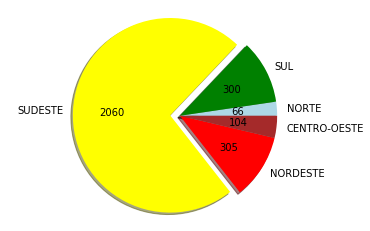

In [141]:
## Distribuição por Regiões (Brasil)

import matplotlib.pyplot as plt 
import numpy as np
import json

est_reg = {}

with open('regioes.json') as f:
    regioes = json.load(f)

for i in regioes["unidades-federativas"]:
    est_reg[i["unidade-federativa"].encode("latin-1").decode("utf-8").upper()] = i["regiao"].upper()

est_counter = {"NORTE": 0,"SUL": 0,"SUDESTE": 0,"NORDESTE": 0,"CENTRO-OESTE": 0}
for (x,y) in dic.items():
    try:
        est_counter[est_reg[x]] += y
    except:
        pass
print(est_counter)


labels = ["NORTE","SUL","SUDESTE","NORDESTE","CENTRO-OESTE"]
titulos = [i for i in est_counter.values()]
cores = ['lightblue', 'green', 'yellow', 'red',"brown"]
explode = (0, 0, 0.1, 0, 0)  # somente explode primeiro pedaco
total = sum(titulos)
plt.pie(titulos, explode=explode, labels=labels, colors=cores, autopct=lambda p: '{:.0f}'.format(p * total / 100), shadow=True, startangle=0)

plt.axis('equal') 
plt.show()

In [ ]:
#rascunho do dev
'''
est_reg = {"Norte":{},"Sul":{},"Sudeste":{},"Nordeste":{},"Centro-Oeste":{}}    
    if i["regiao"] == "Norte":
        est_reg["Norte"][i["unidade-federativa"].encode("latin-1").decode("utf-8").upper()] = 0    
    if i["regiao"] == "Sul":
        est_reg["Sul"] += [i["unidade-federativa"].encode("latin-1").decode("utf-8").upper()]
    if i["regiao"] == "Sudeste":
        est_reg["Sudeste"] += [i["unidade-federativa"].encode("latin-1").decode("utf-8").upper()]
    if i["regiao"] == "Centro-Oeste":
        est_reg["Centro-Oeste"] += [i["unidade-federativa"].encode("latin-1").decode("utf-8").upper()]
    if i["regiao"] == "Nordeste":
        est_reg["Nordeste"] += [i["unidade-federativa"].encode("latin-1").decode("utf-8").upper()]
'''